In [1]:
#필요 모듈 임포트
import pandas as pd
import numpy as np

#지수표현식사용X
pd.options.display.float_format = '{:.5f}'.format 

#시각화 모듈 임포트
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
import seaborn as sns

#폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
#원본데이터 불러오기
FRIE=pd.read_csv('./Aicon/02.격자단위_구급출동_dataset.csv',encoding='utf-8-sig')
FRIE.head()

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX
0,38045314,380475,531475,0,20200101,4213000000,2.88000,0.72000,0,0,0,0,0,0,0,0
1,38045324,380475,532475,0,20200101,4213000000,9.36000,1.44000,0,0,0,0,0,0,0,0
2,38145354,381475,535475,0,20200101,4213000000,3.93000,0.15000,0,0,0,0,0,0,0,0
3,38245184,382475,518475,0,20200101,4213000000,2.69000,0.16000,0,0,0,0,0,0,0,0
4,38245194,382475,519475,0,20200101,4213000000,2.35000,0.14000,0,0,0,0,0,0,0,0


In [4]:
# 테스트 할 데이터 나누기

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(FRIE, test_size=0.1,shuffle=True,random_state=1004)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (1592170, 16)
X_test shape: (176908, 16)


In [4]:
#트레인 테스트 데이터 저장

#X_train.to_csv('aicon_traindata.csv',encoding='utf-8-sig')
#X_test.to_csv('aicon_testdata.csv',encoding='utf-8-sig')

### aicon_train data 활용 

### 앞서 파일명을 토대로 유동인구와 노인유동인구의 상관관계가 크다는 것을 파악하여 pca를 통해 차원 축소 진행.

출처 https://m.blog.naver.com/tjdrud1323/221720259834

In [5]:
# 파일불러오기

TRAIN_FIRE_119=pd.read_csv('aicon_traindata.csv',encoding='utf-8-sig')
FIRE_119=TRAIN_FIRE_119.copy()
FIRE_119.head()

,Unnamed: 0,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX
0,1451995,38645274,386475,527475,16,20201026,4213000000,1.22000,0.15000,0,0,0,0,0,0,0,0
1,1383175,40845154,408475,515475,18,20201013,4213000000,1.37000,0.51000,0,0,0,0,0,0,0,0
2,1487092,39545274,395475,527475,11,20201103,4213000000,8481.22000,1458.01000,0,0,0,0,0,0,0,0
3,1382369,38145214,381475,521475,16,20201013,4213000000,9.15000,1.65000,0,0,0,0,0,0,0,0
4,1119634,39645254,396475,525475,9,20200822,4213000000,1880.31000,183.46000,0,0,0,0,0,0,0,0


In [6]:
# shape 확인
FIRE_119.shape

(1592170, 17)

In [7]:
# 필요없는 행 삭제
FIRE_119=FIRE_119.drop(FIRE_119.columns[0],axis=1)
FIRE_119.head()

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX
0,38645274,386475,527475,16,20201026,4213000000,1.22000,0.15000,0,0,0,0,0,0,0,0
1,40845154,408475,515475,18,20201013,4213000000,1.37000,0.51000,0,0,0,0,0,0,0,0
2,39545274,395475,527475,11,20201103,4213000000,8481.22000,1458.01000,0,0,0,0,0,0,0,0
3,38145214,381475,521475,16,20201013,4213000000,9.15000,1.65000,0,0,0,0,0,0,0,0
4,39645254,396475,525475,9,20200822,4213000000,1880.31000,183.46000,0,0,0,0,0,0,0,0


In [8]:
#datetime으로 만들기
FIRE_119['datetime'] =FIRE_119['YMD'].apply(lambda x: pd.to_datetime(str(x), format='%Y/%m/%d'))
FIRE_119

# DataFrame의 index 변형하기
FIRE_119.set_index('datetime', inplace=True) 

#월-일 컬럼 생성
FIRE_119['month']=FIRE_119.index.month
FIRE_119['day']=FIRE_119.index.day
FIRE_119=FIRE_119.reset_index()
FIRE_119

,datetime,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX,month,day
0,2020-10-26,38645274,386475,527475,16,20201026,4213000000,1.22000,0.15000,0,0,0,0,0,0,0,0,10,26
1,2020-10-13,40845154,408475,515475,18,20201013,4213000000,1.37000,0.51000,0,0,0,0,0,0,0,0,10,13
2,2020-11-03,39545274,395475,527475,11,20201103,4213000000,8481.22000,1458.01000,0,0,0,0,0,0,0,0,11,3
3,2020-10-13,38145214,381475,521475,16,20201013,4213000000,9.15000,1.65000,0,0,0,0,0,0,0,0,10,13
4,2020-08-22,39645254,396475,525475,9,20200822,4213000000,1880.31000,183.46000,0,0,0,0,0,0,0,0,8,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592165,2020-12-26,38345334,383475,533475,7,20201226,4213000000,2.86000,0.05000,0,0,0,0,0,0,0,0,12,26
1592166,2020-04-28,38945074,389475,507475,9,20200428,4213000000,123.34000,27.29000,0,0,0,0,0,0,0,0,4,28
1592167,2020-02-16,39345194,393475,519475,18,20200216,4213000000,8.52000,0.48000,0,0,0,0,0,0,0,0,2,16
1592168,2020-02-21,39745354,397475,535475,19,20200221,4213000000,67.24000,0.99000,0,0,0,0,0,0,0,0,2,21


## pca로 유동지수,노인유동지수 차원축소

##### 월-일-시간-유동지수-노인유동지수(mean) 

##### 유동지수-노인유동지수만 추출하여 pca

In [28]:
fire_119=FIRE_119.groupby(['month','day','TIME'])['FP_IDEX','OLD_FP_IDEX'].mean()
fire_119

<ipython-input-28-f8702bad27ee>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fire_119=FIRE_119.groupby(['month','day','TIME'])['FP_IDEX','OLD_FP_IDEX'].mean()


FP_IDEX  OLD_FP_IDEX
month day TIME                       
1     1   0    315.07911     18.37347
          1    331.39865     18.49008
          2    278.01319     16.33637
          3    266.19694     15.87264
          4    257.35603     16.48017
...                  ...          ...
12    30  19   586.03429     55.61063
          20   606.39980     58.74980
          21   611.42889     60.20955
          22   601.84351     60.72859
          23   571.67367     58.46283

[8496 rows x 2 columns]

In [29]:
#pca 하기 전에 각 변수 값 스케일 진행

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(fire_119[['FP_IDEX','OLD_FP_IDEX']])
Normalized_Values = scaler.transform(fire_119[['FP_IDEX','OLD_FP_IDEX']])
Normalized_Values


array([[0.28520899, 0.11141635],
       [0.31906171, 0.11350366],
       [0.20832063, 0.07495301],
       ...,
       [0.89994736, 0.86026818],
       [0.88006376, 0.86955895],
       [0.81748041, 0.82900258]])

In [17]:
import pickle
import joblib

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [30]:
#pca 진행

from sklearn.decomposition import PCA
pca = PCA(n_components=1) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(Normalized_Values)

,TOTAL_FP_IDEX
0,-0.34227
1,-0.31520
2,-0.42437
3,-0.44839
4,-0.45523
...,...
8491,0.51826
8492,0.58690
8493,0.61182
8494,0.60277


In [18]:
joblib.dump(pca, 'pca.pkl')

['pca.pkl']

In [23]:
printcipalComponents

array([[-0.34226571],
       [-0.31520429],
       [-0.42437385],
       ...,
       [ 0.61182384],
       [ 0.60277332],
       [ 0.52886271]])

In [31]:
# 데이터에 TOTAL_FP_IDEX 컬럼 추가
fire_119['TOTAL_FP_IDEX']=printcipalComponents
fire_119

FP_IDEX  OLD_FP_IDEX  TOTAL_FP_IDEX
month day TIME                                      
1     1   0    315.07911     18.37347       -0.34227
          1    331.39865     18.49008       -0.31520
          2    278.01319     16.33637       -0.42437
          3    266.19694     15.87264       -0.44839
          4    257.35603     16.48017       -0.45523
...                  ...          ...            ...
12    30  19   586.03429     55.61063        0.51826
          20   606.39980     58.74980        0.58690
          21   611.42889     60.20955        0.61182
          22   601.84351     60.72859        0.60277
          23   571.67367     58.46283        0.52886

[8496 rows x 3 columns]

## 출동빈도=0 인 df과 출동빈도!=0인 df 만들기

In [101]:
# 출동빈도수 월-일-시간으로 추출

fire_119_cnt=FIRE_119.groupby(['month','day','TIME'])['DSP_CNT_IDEX'].mean()
fire_119_cnt=pd.DataFrame(fire_119_cnt)
fire_119_cnt

DSP_CNT_IDEX
month day TIME              
1     1   0          0.03226
          1          0.01587
          2          0.00885
          3          0.01653
          4          0.02586
...                      ...
12    30  19         0.00976
          20         0.02538
          21         0.01005
          22         0.01081
          23         0.00556

[8496 rows x 1 columns]

In [102]:
#출동빈도 0인 df 생성
fire_119_cnt['TOTAL_FP_IDEX']=printcipalComponents
fire_119_zero=fire_119_cnt.query('DSP_CNT_IDEX==0')
fire_119_zero.reset_index(inplace=True)

In [157]:
#필요한 컬럼만 추출

fire_119_zero_k=fire_119_zero[['month','day','TIME','TOTAL_FP_IDEX',]]
fire_119_zero_k

,month,day,TIME,TOTAL_FP_IDEX
0,1,1,8,-0.32832
1,1,1,15,0.04011
2,1,1,16,0.04839
3,1,1,17,0.06476
4,1,1,18,0.01938
...,...,...,...,...
1916,12,30,5,-0.20031
1917,12,30,7,-0.05032
1918,12,30,12,0.17545
1919,12,30,15,0.37384


In [104]:
#출동빈도 0이 아닌 df 생성

fire_119_nonzero=fire_119_cnt.query('DSP_CNT_IDEX!=0')
fire_119_nonzero.reset_index(inplace=True)

In [105]:
max(fire_119_nonzero['TOTAL_FP_IDEX']),max(fire_119_nonzero['DSP_CNT_IDEX'])

(0.7059024795838706, 0.07758620689655173)

In [106]:
# 필요한 컬럼만 추출
## 클러스터링 위해서 DSP 자릿수 맞추기
fire_119_nonzero_k=fire_119_nonzero[['month','day','TIME','TOTAL_FP_IDEX','DSP_CNT_IDEX']]
fire_119_nonzero_k['DSP_CNT_IDEX']=fire_119_nonzero_k['DSP_CNT_IDEX']*10
fire_119_nonzero_k

,month,day,TIME,TOTAL_FP_IDEX,DSP_CNT_IDEX
0,1,1,0,-0.34227,0.32258
1,1,1,1,-0.31520,0.15873
2,1,1,2,-0.42437,0.08850
3,1,1,3,-0.44839,0.16529
4,1,1,4,-0.45523,0.25862
...,...,...,...,...,...
6570,12,30,19,0.51826,0.09756
6571,12,30,20,0.58690,0.25381
6572,12,30,21,0.61182,0.10050
6573,12,30,22,0.60277,0.10811


## 클러스터링 

참고 https://blog.naver.com/spiderman25/222500271920

최적의 n값 찾기 https://m.blog.naver.com/samsjang/221017639342

### 출동빈도 0인 df kmean

In [107]:
# 출동빈도 0인 df 클러스터링

fire_119_zero_km=fire_119_zero_k['TOTAL_FP_IDEX']
fire_119_zero_km=pd.DataFrame(fire_119_zero_km)
fire_119_zero_km

,TOTAL_FP_IDEX
0,-0.32832
1,0.04011
2,0.04839
3,0.06476
4,0.01938
...,...
1916,-0.20031
1917,-0.05032
1918,0.17545
1919,0.37384


In [108]:
fire_119_zero_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TOTAL_FP_IDEX  1921 non-null   float64
dtypes: float64(1)
memory usage: 15.1 KB


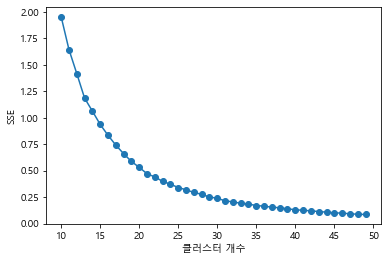

In [109]:
from sklearn.cluster import KMeans
def elbow(fire_119_zero_km):
    sse=[]
    for i in range(10,50):
        km=KMeans(n_clusters=i, init='k-means++',random_state=0)
        km.fit(fire_119_zero_km)
        sse.append(km.inertia_)
        
    plt.plot(range(10,50),sse,marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()

elbow(fire_119_zero_km)

In [110]:
# 클러스터링 필요모듈 임포트
from scipy import stats
%matplotlib inline

# k-means++ 진행
from sklearn.cluster import KMeans
kmeans_zero = KMeans(n_clusters=18, random_state =0, init='k-means++').fit(fire_119_zero_km)
kmeans_zero



KMeans(n_clusters=18, random_state=0)

In [111]:
kmeans_zero.cluster_centers_

array([[-0.45317694],
       [ 0.1137168 ],
       [ 0.4211324 ],
       [-0.21719415],
       [-0.36003411],
       [ 0.25970473],
       [-0.08924832],
       [ 0.62102652],
       [ 0.34112589],
       [-0.27188993],
       [ 0.18133451],
       [-0.02343794],
       [-0.51470404],
       [-0.15795658],
       [-0.40525035],
       [ 0.49982818],
       [-0.31379945],
       [ 0.05129204]])

In [112]:
kmeans_zero.inertia_

0.6611973379254247

In [113]:
kmeans_zero.labels_

array([16, 17, 17, ..., 10,  8,  7])

In [158]:
#클러스터링 라벨값 컬럼 생성

fire_119_zero_k['clustering']=kmeans_zero.labels_
fire_119_zero_k

,month,day,TIME,TOTAL_FP_IDEX,clustering
0,1,1,8,-0.32832,16
1,1,1,15,0.04011,17
2,1,1,16,0.04839,17
3,1,1,17,0.06476,17
4,1,1,18,0.01938,17
...,...,...,...,...,...
1916,12,30,5,-0.20031,3
1917,12,30,7,-0.05032,11
1918,12,30,12,0.17545,10
1919,12,30,15,0.37384,8


In [115]:
# 클러스터링 분류 확인

#fire_119_zero_k.query('TOTAL_FP_IDEX>0.3')
df1=fire_119_zero_k.query('clustering==1')
df1

,month,day,TIME,TOTAL_FP_IDEX,clustering
26,1,6,12,0.11545,1
38,1,8,10,0.09394,1
56,1,11,23,0.11462,1
97,1,18,23,0.12733,1
103,1,19,16,0.09156,1
...,...,...,...,...,...
1835,12,17,15,0.09606,1
1839,12,18,11,0.09289,1
1885,12,25,14,0.14477,1
1898,12,27,14,0.10607,1


In [116]:
df1.describe()

,month,day,TIME,TOTAL_FP_IDEX,clustering
count,92.00000,92.00000,92.00000,92.00000,92.00000
mean,6.46739,15.53261,15.01087,0.11442,1.00000
std,3.45601,8.41434,3.86729,0.01959,0.00000
min,1.00000,1.00000,10.00000,0.08286,1.00000
25%,3.00000,7.75000,12.00000,0.09601,1.00000
50%,6.00000,17.00000,14.50000,0.11477,1.00000
75%,9.00000,23.00000,17.00000,0.13247,1.00000
max,12.00000,30.00000,23.00000,0.14728,1.00000


In [159]:
# TOTAL_FP_IDEX 오름차순 정렬
fire_119_zero_k=fire_119_zero_k.sort_values(['TOTAL_FP_IDEX'])
fire_119_zero_k.reset_index(inplace=True)

In [161]:
fire_119_zero_k.head()

,index,month,day,TIME,TOTAL_FP_IDEX,clustering
0,566,4,5,4,-0.63132,12
1,380,3,8,3,-0.59721,12
2,1282,9,6,0,-0.59187,12
3,381,3,8,4,-0.56426,12
4,729,5,4,2,-0.55725,12


In [163]:
# 낮은 순서대로 점수 부여 (선형성이 확인 됐다.)
fire_119_zero_k['score']=np.nan
temp=1
fire_119_zero_k.loc[0,'score']=1
for i in range(1,len(fire_119_zero_k)):
    if  fire_119_zero_k.loc[i,'clustering'] != fire_119_zero_k.loc[i-1,'clustering']:
        temp+=1
        fire_119_zero_k.loc[i,'score']=temp
        continue
    fire_119_zero_k.loc[i,'score']=temp

In [164]:
fire_119_zero_k.head()

,index,month,day,TIME,TOTAL_FP_IDEX,clustering,score
0,566,4,5,4,-0.63132,12,1.00000
1,380,3,8,3,-0.59721,12,1.00000
2,1282,9,6,0,-0.59187,12,1.00000
3,381,3,8,4,-0.56426,12,1.00000
4,729,5,4,2,-0.55725,12,1.00000


In [165]:
fire_119_zero_k.to_csv("출동빈도0인_clustering.csv", index=False)

### 출동빈도 0이 아닌 df kmean

In [117]:
# 출동빈도 0이 아닌 df 클러스터링

fire_119_nonzero_km=fire_119_nonzero_k[['DSP_CNT_IDEX','TOTAL_FP_IDEX']]
fire_119_nonzero_km

,DSP_CNT_IDEX,TOTAL_FP_IDEX
0,0.32258,-0.34227
1,0.15873,-0.31520
2,0.08850,-0.42437
3,0.16529,-0.44839
4,0.25862,-0.45523
...,...,...
6570,0.09756,0.51826
6571,0.25381,0.58690
6572,0.10050,0.61182
6573,0.10811,0.60277


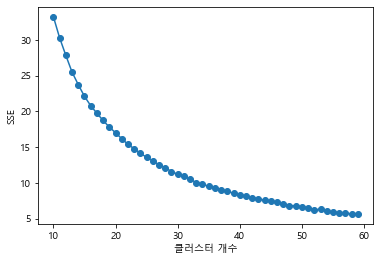

In [118]:
# 최적의 n값 찾기

def elbow(fire_119_nonzero_km):
    sse=[]
    for i in range(10,60):
        km=KMeans(n_clusters=i, init='k-means++',random_state=0)
        km.fit(fire_119_nonzero_km)
        sse.append(km.inertia_)
        
    plt.plot(range(10,60),sse,marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()

elbow(fire_119_nonzero_km)

In [119]:
# 클러스터링 필요모듈 임포트
from scipy import stats
from sklearn.cluster import KMeans
%matplotlib inline

# k-means++ 진행
from sklearn.cluster import KMeans
kmeans_nonzero = KMeans(n_clusters=23, random_state =0, init='k-means++').fit(fire_119_nonzero_km)
kmeans_nonzero

KMeans(n_clusters=23, random_state=0)

In [120]:
kmeans_nonzero.cluster_centers_

array([[ 0.06439538,  0.12011556],
       [ 0.09101965, -0.37048971],
       [ 0.2326104 ,  0.49322473],
       [ 0.07346826,  0.3137628 ],
       [ 0.07926601, -0.17074463],
       [ 0.22649017,  0.03384065],
       [ 0.06570756, -0.06337216],
       [ 0.35660751, -0.4220776 ],
       [ 0.15149814,  0.24052156],
       [ 0.08768847,  0.54224072],
       [ 0.18055401, -0.19703543],
       [ 0.20199114, -0.32314265],
       [ 0.16660272,  0.37181542],
       [ 0.19129164, -0.43140326],
       [ 0.06506603,  0.21527735],
       [ 0.07299668,  0.41949852],
       [ 0.09479003, -0.47247045],
       [ 0.15739549,  0.13202956],
       [ 0.27746243,  0.28668361],
       [ 0.33059859, -0.21039277],
       [ 0.16047865, -0.06593992],
       [ 0.08365454,  0.03233996],
       [ 0.08700212, -0.27558805]])

In [121]:
kmeans_nonzero.inertia_

14.78487590927638

In [122]:
kmeans_nonzero .labels_

array([ 7, 11, 16, ...,  9,  9,  9])

In [123]:
#클러스터링 라벨값 컬럼 생성
fire_119_nonzero_k['clustering']=kmeans_nonzero.labels_
fire_119_nonzero_k

,month,day,TIME,TOTAL_FP_IDEX,DSP_CNT_IDEX,clustering
0,1,1,0,-0.34227,0.32258,7
1,1,1,1,-0.31520,0.15873,11
2,1,1,2,-0.42437,0.08850,16
3,1,1,3,-0.44839,0.16529,13
4,1,1,4,-0.45523,0.25862,13
...,...,...,...,...,...,...
6570,12,30,19,0.51826,0.09756,9
6571,12,30,20,0.58690,0.25381,2
6572,12,30,21,0.61182,0.10050,9
6573,12,30,22,0.60277,0.10811,9


In [131]:
# 클러스터링 분류 확인

df_1=fire_119_nonzero_k.query('clustering==2')
df_1

,month,day,TIME,TOTAL_FP_IDEX,DSP_CNT_IDEX,clustering
162,1,9,19,0.46868,0.20000,2
163,1,9,20,0.51767,0.25907,2
273,1,15,19,0.51925,0.19900,2
512,1,28,20,0.46626,0.21390,2
550,1,30,19,0.46515,0.31088,2
...,...,...,...,...,...,...
6520,12,27,22,0.54917,0.34286,2
6538,12,28,21,0.61497,0.20513,2
6551,12,29,19,0.58963,0.36082,2
6569,12,30,17,0.50099,0.23585,2


In [132]:
df_1.describe()

,month,day,TIME,TOTAL_FP_IDEX,DSP_CNT_IDEX,clustering
count,125.00000,125.00000,125.00000,125.00000,125.00000,125.00000
mean,7.45600,16.32800,20.13600,0.49322,0.23261,2.00000
std,3.55034,8.62739,1.62810,0.05133,0.05920,0.00000
min,1.00000,1.00000,16.00000,0.41180,0.15152,2.00000
25%,4.00000,9.00000,19.00000,0.45680,0.19231,2.00000
50%,8.00000,16.00000,20.00000,0.47734,0.21858,2.00000
75%,11.00000,24.00000,21.00000,0.52409,0.25641,2.00000
max,12.00000,30.00000,23.00000,0.62316,0.48780,2.00000


In [134]:
fire_119_nonzero_k.query('DSP_CNT_IDEX>0.5')

,month,day,TIME,TOTAL_FP_IDEX,DSP_CNT_IDEX,clustering
839,2,16,16,0.00154,0.62802,19
3729,7,27,4,-0.25380,0.70175,19
3929,8,7,0,-0.41885,0.55046,7
3992,8,10,1,-0.34864,0.55046,7
4191,8,20,1,-0.26412,0.54545,19
4355,8,28,15,0.10798,0.59829,18
5513,10,30,0,-0.41685,0.53097,7
5640,11,7,0,-0.39187,0.77586,7


In [135]:
# SCORE 만들기
# 오름차순 정렬
fire_119_nonzero_k=fire_119_nonzero_k.sort_values(['TOTAL_FP_IDEX','DSP_CNT_IDEX'], ascending = (True, True))
fire_119_nonzero_k.reset_index(inplace=True, drop=True)

In [140]:
# 검토용
for i in range(23):
    temp=fire_119_nonzero_k.query('clustering==@i')
    print("cluster=",i,"TOTAL_FP_IDEX=", temp['TOTAL_FP_IDEX'].mean().round(4),"DSP_CNT_IDEX=",temp['DSP_CNT_IDEX'].mean().round(4))
    print("sum=",np.round(temp['TOTAL_FP_IDEX'].mean().round(4)+temp['DSP_CNT_IDEX'].mean().round(4),4))
    print('=================================================================')

cluster= 0 TOTAL_FP_IDEX= 0.1201 DSP_CNT_IDEX= 0.0644
sum= 0.1845
cluster= 1 TOTAL_FP_IDEX= -0.3705 DSP_CNT_IDEX= 0.091
sum= -0.2795
cluster= 2 TOTAL_FP_IDEX= 0.4932 DSP_CNT_IDEX= 0.2326
sum= 0.7258
cluster= 3 TOTAL_FP_IDEX= 0.3142 DSP_CNT_IDEX= 0.073
sum= 0.3872
cluster= 4 TOTAL_FP_IDEX= -0.1711 DSP_CNT_IDEX= 0.0794
sum= -0.0917
cluster= 5 TOTAL_FP_IDEX= 0.034 DSP_CNT_IDEX= 0.2261
sum= 0.2601
cluster= 6 TOTAL_FP_IDEX= -0.0639 DSP_CNT_IDEX= 0.0657
sum= 0.0018
cluster= 7 TOTAL_FP_IDEX= -0.4221 DSP_CNT_IDEX= 0.3566
sum= -0.0655
cluster= 8 TOTAL_FP_IDEX= 0.2405 DSP_CNT_IDEX= 0.1509
sum= 0.3914
cluster= 9 TOTAL_FP_IDEX= 0.543 DSP_CNT_IDEX= 0.0877
sum= 0.6307
cluster= 10 TOTAL_FP_IDEX= -0.197 DSP_CNT_IDEX= 0.1806
sum= -0.0164
cluster= 11 TOTAL_FP_IDEX= -0.3231 DSP_CNT_IDEX= 0.202
sum= -0.1211
cluster= 12 TOTAL_FP_IDEX= 0.3705 DSP_CNT_IDEX= 0.1664
sum= 0.5369
cluster= 13 TOTAL_FP_IDEX= -0.4314 DSP_CNT_IDEX= 0.1913
sum= -0.2401
cluster= 14 TOTAL_FP_IDEX= 0.2153 DSP_CNT_IDEX= 0.065
sum= 0.2803

In [141]:
# 평균 합이 낮은 순서대로 점수 부여하기
score_dic={}
for i in range(23):
    temp=fire_119_nonzero_k.query('clustering==@i')
    score_dic[i]=np.round(temp['TOTAL_FP_IDEX'].mean().round(4)+temp['DSP_CNT_IDEX'].mean().round(4),4)

In [143]:
sorted_dict = sorted(score_dic.items(), key = lambda item: item[1])

In [145]:
score_dic_F={}
temp=1
for i in range(len(sorted_dict)):
    score_dic_F[sorted_dict[i][0]]=temp
    temp+=1

In [147]:
score_dic_F

{16: 1,
 1: 2,
 13: 3,
 22: 4,
 11: 5,
 4: 6,
 7: 7,
 10: 8,
 6: 9,
 20: 10,
 21: 11,
 19: 12,
 0: 13,
 5: 14,
 14: 15,
 17: 16,
 3: 17,
 8: 18,
 15: 19,
 12: 20,
 18: 21,
 9: 22,
 2: 23}

In [148]:
#점수 대입
fire_119_nonzero_k['score']=fire_119_nonzero_k['clustering'].map(lambda x: score_dic_F[x])

In [151]:
fire_119_nonzero_k.head()

,month,day,TIME,TOTAL_FP_IDEX,DSP_CNT_IDEX,clustering,score
0,5,3,1,-0.61850,0.07353,16,1
1,10,1,5,-0.59764,0.05348,16,1
2,5,1,0,-0.59613,0.07874,16,1
3,5,2,3,-0.58379,0.07407,16,1
4,5,1,3,-0.57838,0.07246,16,1


In [150]:
fire_119_nonzero_k.to_csv("출동빈도1이상인_clustering.csv", index=False)